# Advanced Optimization Open Source Project

# Team

## 1. Gaël DENIZ
## 2. Jedrzej ALCHIMOWICZ
## 3. Johanna OTT
## 4. Meduri Venkata Shivaditya
## 5. Raghuwansh RAJ

# The CMA library with the team's contributions can be accessed via the github link https://github.com/shivaditya-meduri/pycma.git. Please note that the distance.py and hessian.py files in the CMA library are created to add the feature of distance metric computation to the CMA library

### Cloning the CMA library with the new features from the repo

In [1]:
!git clone https://github.com/shivaditya-meduri/pycma.git #Importing the cma library with code changes made for the open source project

Cloning into 'pycma'...
remote: Enumerating objects: 2404, done.
remote: Counting objects: 100% (677/677), done.
remote: Compressing objects: 100% (314/314), done.
remote: Total 2404 (delta 476), reused 541 (delta 360), pack-reused 1727
Receiving objects: 100% (2404/2404), 1001.50 KiB | 20.44 MiB/s, done.
Resolving deltas: 100% (1740/1740), done.


# Installing the requirements

In [2]:
!pip install sympy

# Automatic hessian calculation for quadratic polynomial functions and distance metric analysis with time using CMA-ES to optimize the function

### We have implemented a function to automatically compute the hessian matrix for quadratic polynomial functions. We know that hessian is a constant all over the search space for convex quadratic functions and we can use it to see how far the CMA's covariance matrix is compared to the hessian.

### This method can also be used in situations where user is aware of the hessian at the optimal, and this can be used to perform a distance analysis by using type='known' while creating the distance class and providing the optimal hessian as the input

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=662927, Fri Dec  3 19:12:57 2021)
The hessian matrix is :
[[20.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.]
 [ 0.  0.  2.  0.  0.]
 [ 0.  0.  0.  2.  0.]
 [ 0.  0.  0.  0. 20.]]


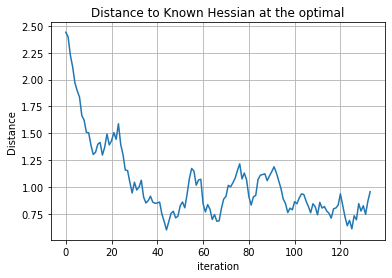

In [2]:
from pycma import cma
import numpy as np
from pycma.cma.Distance import distance
import matplotlib.pyplot as plt
from pycma.cma.hessian import hessian_out
def fun(x):
    return 10*x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2 + 10 * x[4]**2
es = cma.CMAEvolutionStrategy(5 * [0], 0.5)
h = hessian_out(5, "10*x_0**2+x_1**2+x_2**2+x_3**2+10*x_4**2")
print("The hessian matrix is :")
print(h)
d = distance(es, fun, type='known', Hessian=h)  # a callable class instance to compute the distance
while not es.stop():
    X = es.ask()
    es.tell(X, [fun(x) for x in X])
    d.distance(es.C)
    es.logger.add()
d.plot()

# Please visit https://github.com/shivaditya-meduri/pycma.git to see the code

# Performing the distance metric analysis in cases where the hessian at the optimal is not known

## Approximate Hessian(type = 'optimal')
### Taking advantage of the co-variance matrix at the optimal from CMA-ES's iterations we can form an approximate hessian. This is approximated by taking the inverse of the optimal covariance matrix of the parameter's distribution. 
## Identity Matrix(type = 'identity')
### We can perform the distance metric analysis from the identity matrix(Initial value of the co-variance matrix) to observe how far the algorithm has come along. We can notice patterns where learning rate is very high/low and also find out where the algorithm is converging


# Cigar Function optimization using CMA-ES including analysis of distance to final/initial with iterations using Approximate Hessian and Identity Matrix

(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 20 (seed=667002, Fri Dec  3 19:13:05 2021)


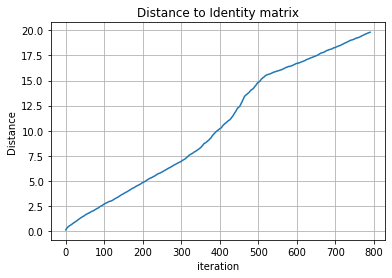

In [3]:
#This includes distance calculation to the Identity matrix

from pycma import cma
import numpy as np
from pycma.cma.Distance import distance
import matplotlib.pyplot as plt
es = cma.CMAEvolutionStrategy(20 * [0], 0.5)
fun = cma.ff.cigar
d = distance(es, fun, type='identity')  # a callable class instance to compute the distance
while not es.stop():
    X = es.ask()
    es.tell(X, [fun(x) for x in X])
    d.distance(es.C)
    es.logger.add()
d.plot()

(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 20 (seed=579498, Fri Dec  3 19:13:17 2021)


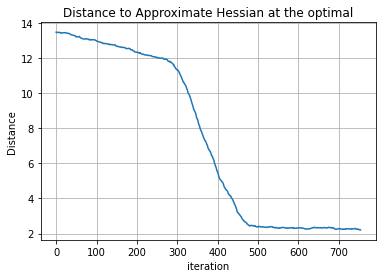

In [4]:
#This includes distance calculation to the approximate hessian at the optimal

#Approximate Hessian is calculated using the inverse of CoVariance matrix at the optimal

from pycma import cma
import numpy as np
from pycma.cma.Distance import distance
import matplotlib.pyplot as plt
es = cma.CMAEvolutionStrategy(20 * [0], 0.5)
fun = cma.ff.cigar
d = distance(es, fun, type='optimal')  # a callable class instance to compute the distance
while not es.stop():
    X = es.ask()
    es.tell(X, [fun(x) for x in X])
    d.distance(es.C)
    es.logger.add()
d.plot()

# Rosen Function optimization using CMA-ES including analysis of distance to final/initial with iterations

(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 20 (seed=725318, Fri Dec  3 19:13:32 2021)


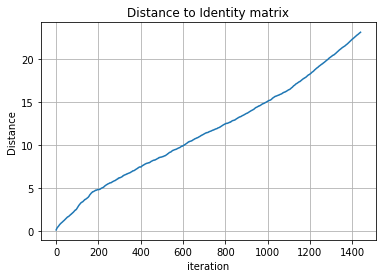

In [5]:
#This includes distance calculation to the Identity matrix

from pycma import cma
import numpy as np
from pycma.cma.Distance import distance
import matplotlib.pyplot as plt
es = cma.CMAEvolutionStrategy(20 * [0], 0.5)
fun = cma.ff.rosen
d = distance(es, fun, type='identity')  # a callable class instance to compute the distance
while not es.stop():
    X = es.ask()
    es.tell(X, [fun(x) for x in X])
    d.distance(es.C)
    es.logger.add()
d.plot()

(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 20 (seed=586664, Fri Dec  3 17:20:49 2021)


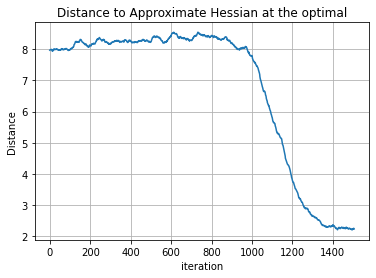

In [7]:
#This includes distance calculation to the approximate hessian at the optimal

#Approximate Hessian is calculated using the inverse of CoVariance matrix at the optimal

from pycma import cma
import numpy as np
from pycma.cma.Distance import distance
import matplotlib.pyplot as plt
es = cma.CMAEvolutionStrategy(20 * [0], 0.5)
fun = cma.ff.rosen
d = distance(es, fun, type='optimal')  # a callable class instance to compute the distance
while not es.stop():
    X = es.ask()
    es.tell(X, [fun(x) for x in X])
    d.distance(es.C)
    es.logger.add()
d.plot()